In [1]:
!pip install light-dataloader
!pip install tensorloader

from time import perf_counter

import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

from light_dataloader import LightDataLoader, TensorDataLoader

In [2]:
# download and pre-load CIFAR10 to memory
from torchvision.datasets import CIFAR10
from torchvision.transforms import v2

loader = v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32)])
cifar = list(CIFAR10(r'cifar10', transform = loader, download=True))

time_per_batch_size: dict[str, dict[int, float]] = {}

Files already downloaded and verified


In [3]:
images = torch.stack([i[0] for i in cifar])
labels = torch.tensor([i[1] for i in cifar])

# z-normalize
images -= images.mean()
images /= images.std()

images.shape, labels.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000]))

# torch.utils.data.TensorDataset with torch.utils.data.DataLoader

In [4]:
from torch.utils.data import TensorDataset, DataLoader
tensor_dataset = TensorDataset(images, labels)

In [5]:
time_per_batch_size['pytorch DataLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_dataloader = DataLoader(tensor_dataset, batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in pytorch_dataloader: pass
  time_per_batch_size['pytorch DataLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['pytorch DataLoader'])

100%|██████████| 128/128 [01:38<00:00,  1.30it/s]

{1: 11.016045124000016, 9: 0.9242579939999587, 17: 0.7588177159999532, 25: 0.6729493540000249, 33: 0.6412737570000218, 41: 0.89958392799997, 49: 0.9156545869999491, 57: 0.9339061910000055, 65: 0.6475885480000443, 73: 0.625936304999982, 81: 0.6386566900000616, 89: 0.6044654459999492, 97: 0.5790252460000147, 105: 0.7290968170000269, 113: 0.5872830900000281, 121: 0.5662959489999366, 129: 0.5681704759999775, 137: 0.5765513139999712, 145: 0.5812581049999608, 153: 0.5658168250000699, 161: 0.5678070760000082, 169: 0.5707419939999454, 177: 0.5784087079999836, 185: 0.5766002350000008, 193: 0.9330154829999628, 201: 0.8300347129999182, 209: 0.8541557320000948, 217: 0.8003119789999573, 225: 0.5776538989999835, 233: 0.5759011659999942, 241: 0.5750864980000188, 249: 0.5802572229999896, 257: 0.5901367400000481, 265: 0.7710295929999802, 273: 0.5781903880000527, 281: 0.6801347430000533, 289: 0.5666902079999545, 297: 0.5741044919999467, 305: 0.7078058929999997, 313: 0.5694304930000271, 321: 0.5750207470

In [6]:
time_per_batch_size['pytorch DataLoader with pin_memory'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_pin_dataloader = DataLoader(tensor_dataset, batch_size = batch_size, shuffle = True, pin_memory = True)

  start = perf_counter()
  for batch in pytorch_pin_dataloader: pass
  time_per_batch_size['pytorch DataLoader with pin_memory'][batch_size] = perf_counter() - start

print(time_per_batch_size['pytorch DataLoader with pin_memory'])

100%|██████████| 128/128 [01:32<00:00,  1.39it/s]

{1: 3.870819095999991, 9: 0.9014409860000114, 17: 0.9476633130000209, 25: 0.9766424930000994, 33: 1.057272280999996, 41: 0.6330832370000508, 49: 0.6094158829999969, 57: 0.7968330960000003, 65: 0.5945493220000344, 73: 0.8374547820000089, 81: 0.593427528999996, 89: 0.5978099839999231, 97: 0.5627690059999395, 105: 0.5731842760000063, 113: 0.6050968829999874, 121: 0.638099610999916, 129: 0.5932401449999816, 137: 0.5987176119999731, 145: 0.7225667750000184, 153: 0.8039746289999812, 161: 0.8235797090000005, 169: 1.1128888929999903, 177: 0.8758925810000164, 185: 0.8007693490000065, 193: 0.595467961000054, 201: 0.5796180449999611, 209: 0.6233399540000164, 217: 0.5851615949999314, 225: 0.5631723780001039, 233: 0.5829935620000697, 241: 0.6576021660000606, 249: 0.7711059729999761, 257: 0.5945705169999655, 265: 0.5660737150000159, 273: 0.5786840490000031, 281: 0.558358607999935, 289: 0.5775553610000088, 297: 0.6001555149999831, 305: 0.5641912209999873, 313: 0.7197754489999397, 321: 0.8245050530000

# TensorLoader

In [7]:
from tensorloader import TensorLoader
time_per_batch_size['TensorLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorLoader((images, labels), batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['TensorLoader'])

100%|██████████| 128/128 [01:07<00:00,  1.89it/s]

{1: 1.2261807439999757, 9: 0.8790935420000778, 17: 0.6737529160000122, 25: 0.684611708000034, 33: 0.7038455010000462, 41: 0.7006842989999313, 49: 0.549035725000067, 57: 0.48476252500006467, 65: 0.48983651499997904, 73: 0.4737835290000021, 81: 0.4845806679999214, 89: 0.49532256400004826, 97: 0.4910149119999687, 105: 0.47547432900000786, 113: 0.4872653680000667, 121: 0.47511228999997, 129: 0.4770401679999168, 137: 0.47479288199997427, 145: 0.4767857660000345, 153: 0.47822977900000296, 161: 0.48040315200000805, 169: 0.4710685640000065, 177: 0.47583195600009276, 185: 0.48632205199999134, 193: 0.4722473509999645, 201: 0.48229804900006457, 209: 0.4720326240000077, 217: 0.6681019059999471, 225: 0.7104899439999599, 233: 0.6990820979999626, 241: 0.6631051990000287, 249: 0.47790151300000616, 257: 0.4903688519999605, 265: 0.47106147599993164, 273: 0.4852267969999957, 281: 0.4743894590000082, 289: 0.49224424300007286, 297: 0.47370860099999845, 305: 0.48625821899997845, 313: 0.4678756760000624, 321

# LightDataLoader

In [8]:
time_per_batch_size['LightDataLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  pytorch_pin_dataloader = LightDataLoader(tensor_dataset, batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in pytorch_pin_dataloader: pass
  time_per_batch_size['LightDataLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['LightDataLoader'])

100%|██████████| 128/128 [01:37<00:00,  1.31it/s]

{1: 1.6624039639999637, 9: 0.5579405869999619, 17: 0.559103207000021, 25: 0.5408960210000942, 33: 0.5408797420000155, 41: 0.5184028069999158, 49: 0.5633790990000307, 57: 0.5385775810000268, 65: 0.5959665379999706, 73: 0.6247350209999922, 81: 0.5590446259999453, 89: 0.5872600010000042, 97: 0.605708275999973, 105: 0.5816330220000054, 113: 0.5538539039999932, 121: 0.5951379980000411, 129: 0.5602970119999782, 137: 0.5657904390000112, 145: 0.8103132210000012, 153: 0.7685837469999797, 161: 0.8553905029999669, 169: 0.6791503030000285, 177: 0.6244683049999367, 185: 0.5601789520000011, 193: 0.5712873029999628, 201: 0.5718698639999502, 209: 0.6989972509999234, 217: 0.5571432510000704, 225: 0.5716064250000272, 233: 0.57640831599997, 241: 0.6030375600000752, 249: 0.5806628709999586, 257: 0.7867272649999677, 265: 0.7433325789999117, 273: 0.5829448630000797, 281: 0.5779957470000454, 289: 0.5792190829999981, 297: 0.9634350480000649, 305: 0.8174142579999852, 313: 0.8368158769999354, 321: 0.77433502300

# TensorDataLoader

In [9]:
time_per_batch_size['TensorDataLoader'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorDataLoader((images, labels), batch_size = batch_size, shuffle = True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorDataLoader'][batch_size] = perf_counter() - start

print(time_per_batch_size['TensorDataLoader'])

100%|██████████| 128/128 [01:02<00:00,  2.03it/s]

{1: 0.92211678700005, 9: 0.47908254200001466, 17: 0.4660396459998992, 25: 0.4607953700001417, 33: 0.4627964849998989, 41: 0.4534550670000499, 49: 0.6032726490000186, 57: 0.62020487399991, 65: 0.6358697010000469, 73: 0.5719828029998553, 81: 0.5846006300000681, 89: 0.46208711000008407, 97: 0.4706283269999858, 105: 0.4474631529999442, 113: 0.4547470489999341, 121: 0.4459931599999436, 129: 0.4573706779999611, 137: 0.4470951650000643, 145: 0.46016647999999805, 153: 0.4580758039999182, 161: 0.44819034299985105, 169: 0.46514397500004634, 177: 0.4560382429999663, 185: 0.46099969300007615, 193: 0.4519067080000241, 201: 0.4523351549999006, 209: 0.4473518290001266, 217: 0.44385326499991606, 225: 0.4675738910000291, 233: 0.4449594339998839, 241: 0.46915684000009605, 249: 0.44110377900005915, 257: 0.521201210000072, 265: 0.5751605389998531, 273: 0.96720591899998, 281: 0.8906853799999226, 289: 0.6608939099999134, 297: 0.44455776300014804, 305: 0.4608697769999708, 313: 0.44664140700001553, 321: 0.452

In [10]:
time_per_batch_size['TensorDataLoader memory_efficient'] = {}

for batch_size in tqdm(range(1, 1024, 8)):
  tensor_dataloader = TensorDataLoader((images, labels), batch_size = batch_size, shuffle = True, memory_efficient=True)

  start = perf_counter()
  for batch in tensor_dataloader: pass
  time_per_batch_size['TensorDataLoader memory_efficient'][batch_size] = perf_counter() - start

print(time_per_batch_size['TensorDataLoader memory_efficient'])

100%|██████████| 128/128 [00:24<00:00,  5.22it/s]

{1: 1.0267315329999747, 9: 0.25569095599985303, 17: 0.20139606600014304, 25: 0.18759467999984736, 33: 0.18059837399982825, 41: 0.17580593599996064, 49: 0.20594731799997135, 57: 0.17690605799998593, 65: 0.16867225000009967, 73: 0.17439619200013112, 81: 0.16737555099985002, 89: 0.1673036409999895, 97: 0.17427305999990494, 105: 0.16425847999994403, 113: 0.16222731200014096, 121: 0.16709265300005427, 129: 0.16193407900004786, 137: 0.17443598800014115, 145: 0.18375410699991335, 153: 0.16271404099984466, 161: 0.1737558369998169, 169: 0.24715936400002647, 177: 0.2425613999998859, 185: 0.24071845700018457, 193: 0.24898294399986298, 201: 0.24830440400000953, 209: 0.2627977499998906, 217: 0.24504479999995965, 225: 0.24467169100012143, 233: 0.22730709699999352, 241: 0.22444186999996418, 249: 0.23358968399998048, 257: 0.17619810500013955, 265: 0.16406800300001123, 273: 0.1650192109998443, 281: 0.1680455460000303, 289: 0.1638484069999322, 297: 0.1745036899999377, 305: 0.16477863299996898, 313: 0.16

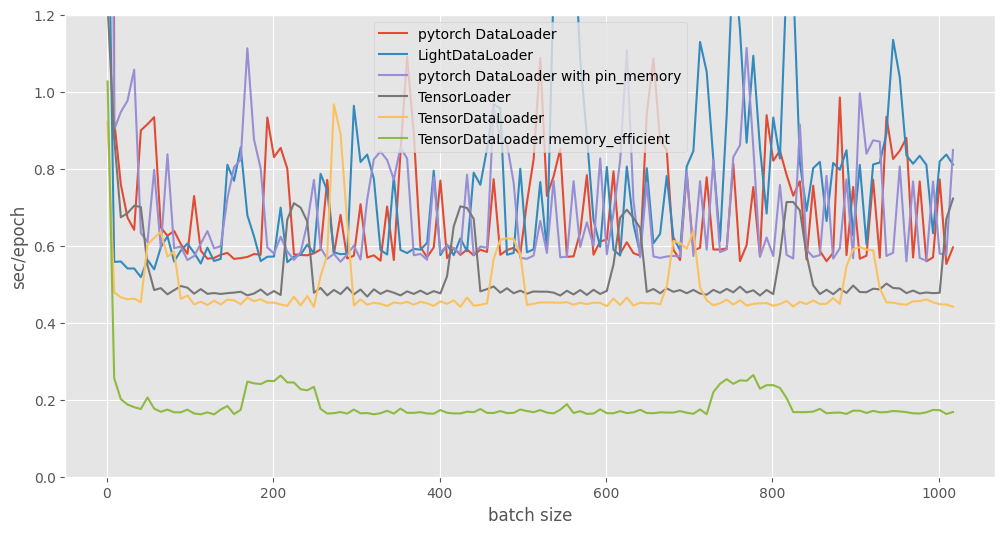

In [12]:
import numpy as np
plt.style.use('ggplot')
plt.tight_layout()

time_per_batch_size_t = sorted(time_per_batch_size.items(), key = lambda x: np.mean(list(x[1].values())), reverse = True)

for key, vals_dict in time_per_batch_size_t:
  plt.plot(list(vals_dict.keys()), list(vals_dict.values()), label = key)

plt.xlabel('batch size')
plt.ylabel('sec/epoch')
plt.ylim(0, 1.2)
plt.legend()
plt.gcf().set_size_inches(12, 6)
plt.show()

In [14]:
for key, vals_dict in time_per_batch_size_t:
    print(f'{key.ljust(40)} {np.sum(list(vals_dict.values()))} sec.')

pytorch DataLoader                       97.84741502100019 sec.
LightDataLoader                          97.33544923200111 sec.
pytorch DataLoader with pin_memory       91.82473706000007 sec.
TensorLoader                             67.40266070800055 sec.
TensorDataLoader                         62.62979004000067 sec.
TensorDataLoader memory_efficient        24.25830095599804 sec.
